In [1]:
import os
import sys
sys.path.insert(0, os.path.join(os.getenv("HOME"), "linked-data-latex"))

import logging
logging.basicConfig(level="INFO")

import pandas as pd
from matplotlib import pylab as plt
from astropy import units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [2]:
# oda:version "v0.1.13"
nsampler=30

In [3]:
from odafunction.executors import default_execute_to_value
from odafunction.func.urifunc import URIipynbFunction, URIValue

focus_obs_name='total_3p'

# TODO: set version restriction here
# TODO: make nb2workflow store in remote storages
# TODO: make possible to disrupt equivalence with indications
# TODO: make common fd/fc depending on

v = default_execute_to_value(URIipynbFunction.from_generic_uri("file:///home/savchenk/grb221009/grbbase.ipynb")(focus_obs_name=focus_obs_name), valueclass=URIValue, cached=True)

import io
import tempfile
import base64
import tarfile
    
with tarfile.open(v['output_values']['fits_pack_url'].replace("file://", "")) as tar:
    tar.extractall(path=f"grbbase_fitspack_{focus_obs_name}")

!ls -ltor grbbase_fitspack*/*fits

INFO:odafunction.func.urifunc:constructing <class 'odafunction.func.urifunc.URIipynbFunction'> from uri=file:///home/savchenk/grb221009/grbbase.ipynb value=None provenance=None
INFO:odafunction.func.urifunc:parsing URI file:///home/savchenk/grb22100...(45)
INFO:odafunction.func.urifunc:parsed uri file:///home/savchenk/grb221009/grbbase.ipynb as {'modifier': None, 'schema': 'file', 'path': '/home/savchenk/grb221009/grbbase.ipynb', 'funcname': None, 'revision': None}
INFO:nb2workflow.nbadapter:notebook_dir: /home/savchenk/grb221009
INFO:nb2workflow.semantics:input combined turtle: @prefix oda: <http://odahub.io/ontology#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix unit: <http://odahub.io/ontology/unit#> .


<http://odahub.io/ontology#grbbase_e9b2253e> a oda:version "v0.2.26" .
INFO:nb2workflow.semantics:this variation could not be parsed: <http://odahub.i

-rw-rw-r-- 1 savchenk  4472640 Feb 10 23:14 grbbase_fitspack_lc_total_3p/isgri_total_3p_mosaic.fits
-rw-rw-r-- 1 savchenk 17262720 Feb 10 23:14 grbbase_fitspack_lc_total_3p/jemx1_total_3p_mosaic.fits
-rw-rw-r-- 1 savchenk 17262720 Feb 10 23:14 grbbase_fitspack_lc_total_3p/jemx2_total_3p_mosaic.fits
-rw-rw-r-- 1 savchenk 17262720 Feb 10 23:18 grbbase_fitspack_lc_total_3p/jemx1_mosaic.fits
-rw-rw-r-- 1 savchenk 17262720 Feb 10 23:18 grbbase_fitspack_lc_total_3p/jemx2_mosaic.fits
-rw-rw-r-- 1 savchenk  4472640 Feb 10 23:18 grbbase_fitspack_lc_total_3p/isgri_mosaic.fits
-rw-rw-r-- 1 savchenk  4472640 Feb 10 23:18 grbbase_fitspack_total_3p/isgrihe_mosaic.fits
-rw-rw-r-- 1 savchenk  4472640 Feb 10 23:18 grbbase_fitspack_lc_total_3p/isgrihe_mosaic.fits
-rw-rw-r-- 1 savchenk    23040 Feb 10 23:18 grbbase_fitspack_lc_total_3p/JMX1_lc_GRB221009A.fits
-rw-rw-r-- 1 savchenk    23040 Feb 10 23:18 grbbase_fitspack_lc_total_3p/JMX2_lc_GRB221009A.fits
-rw-rw-r-- 1 savchenk    28800 Feb 10 23:18 grbbas

In [4]:
vacs = default_execute_to_value(URIipynbFunction.from_generic_uri("file:///home/savchenk/grb221009/acs.ipynb"), valueclass=URIValue, cached=True)
import pandas as pd
acslc = pd.read_csv(vacs['output_values']['acslc_csv_url'].replace("file://", ""))

INFO:odafunction.func.urifunc:constructing <class 'odafunction.func.urifunc.URIipynbFunction'> from uri=file:///home/savchenk/grb221009/acs.ipynb value=None provenance=None
INFO:odafunction.func.urifunc:parsing URI file:///home/savchenk/grb22100...(41)
INFO:odafunction.func.urifunc:parsed uri file:///home/savchenk/grb221009/acs.ipynb as {'modifier': None, 'schema': 'file', 'path': '/home/savchenk/grb221009/acs.ipynb', 'funcname': None, 'revision': None}
INFO:nb2workflow.nbadapter:notebook_dir: /home/savchenk/grb221009
INFO:nb2workflow.semantics:input combined turtle: @prefix oda: <http://odahub.io/ontology#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix unit: <http://odahub.io/ontology/unit#> .


<http://odahub.io/ontology#acs_e9b2253e> a oda:version "v0.1.3" .
INFO:nb2workflow.semantics:this variation could not be parsed: <http://odahub.io/ontology#acs_e9

In [5]:
from astropy.time import Time

T0_isot = v['output_values']['data']['T0_isot']
T0_ijd = Time(T0_isot).mjd - 51544

# TODO: import from other wfl
src_coord = SkyCoord("19h 13m 03.43s", "+19d 46m 23.1s", unit=u.deg)


In [6]:

from ddpaper.draftdata import load_globals

load_globals("eventinfo", globals())


INFO:ddpaper.draftdata:loading T0_ijd = 8317.553472222222
INFO:ddpaper.draftdata:loading T0_isot = '2022-10-09T13:17:00'
INFO:ddpaper.draftdata:loading source_name = 'GRB221009A'
INFO:ddpaper.draftdata:loading src_coord = <SkyCoord (ICRS): (ra, dec) in deg
    (288.26429167, 19.77308333)>


        59861.532764       -1.132263e-08
        59861.532875       -2.860962e-08
        59861.532967        8.372585e-09
        59861.533060        2.639475e-08
        59861.533152        5.800138e-08
        59861.533243        7.682774e-09
        59861.533336       -2.288027e-08
        59861.533427       -2.711575e-08
        59861.533519       -1.538258e-09
        59861.533612       -4.196331e-08


[]

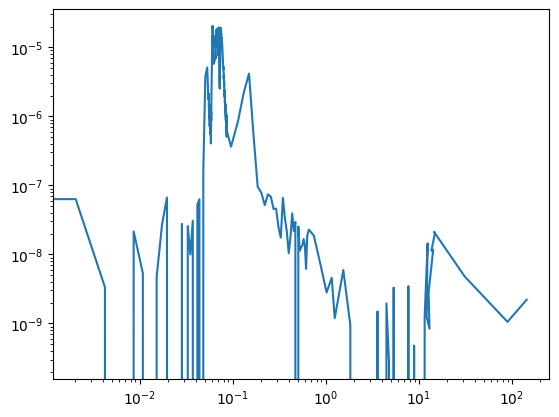

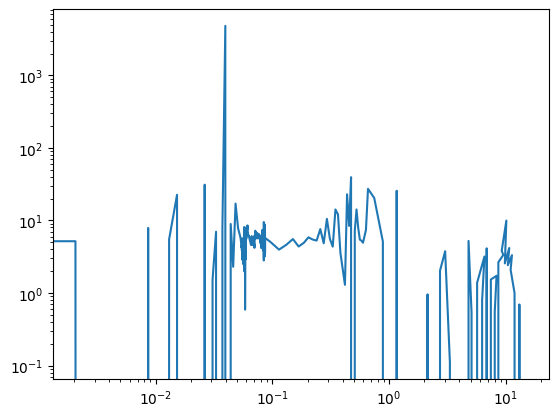

In [7]:
plt.figure()

!head picsit/grb221009a_afterglow_picsit_lc.txt

picsit_lc = pd.read_csv("picsit/grb221009a_afterglow_picsit_lc.txt", delim_whitespace=True, names=["mjd", "flux"])
picsit_hr = pd.read_csv("picsit/grb221009a_afterglow_picsit_hr.txt", delim_whitespace=True, names=["mjd", "hr"])

plt.plot(
    (picsit_lc.mjd - (T0_ijd + 51544))*24, 
    picsit_lc.flux, 
)

plt.loglog()

plt.figure()

plt.plot(
    (picsit_hr.mjd - (T0_ijd + 51544))*24, 
    picsit_hr.hr, 
)

plt.loglog()

In [8]:
import numpy as np
from rebin import rebin_in_bins



In [9]:
picsit_lc.sort_values('mjd', inplace=True)

picsit_lc['flux_err'] = picsit_lc.flux*0 + 1e-8
picsit_lc['dt']  = np.concatenate([[0], np.array(picsit_lc['mjd'])[1:] - np.array(picsit_lc['mjd'])[:-1]])

In [10]:
import subprocess
import io
import pathlib
from astropy.io import fits

def sshopen(fn):
    cfn = pathlib.Path("/tmp/sshopen-cache/") / fn.replace("/", "_")
    cfn.parent.mkdir(exist_ok=True)

    try:
        of = fits.open(cfn)
    except:
        f = io.BytesIO(subprocess.check_output(f"ssh login01.astro.unige.ch tar cf - {fn} | tar xf - -O", shell=True))

        with open(cfn, "wb") as F:
            F.write(f.read())
        
        of = fits.open(cfn)
    return of

sshopen("/isdc/arc/rev_3/scw/2558/255800290010.001/compton_events.fits.gz")


[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7fb89396d4c0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fb8939e2af0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fb8939e2580>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fb8d45198e0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fb8d4519b50>]

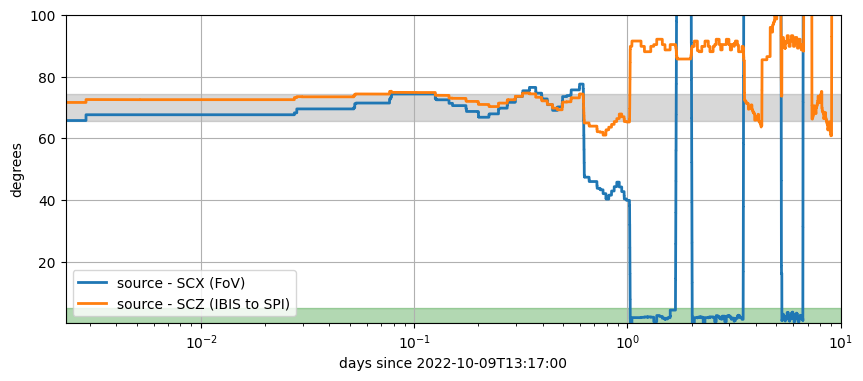

In [11]:
ijd2plot = lambda T: (T - T0_ijd)*24*3600
ijd2plot_d = lambda T: (T - T0_ijd)

att_hist = None

for orbit in ["2558", "2559", "2560", "2561"]:
    _ = sshopen(f"/isdc/arc/rev_3/aux/adp/{orbit}.001/attitude_historic.fits.gz")[1].data
    if att_hist is None:
        att_hist = _
    else:
        att_hist = np.concatenate([att_hist, _])



scx = SkyCoord(att_hist['RA_SCX'], att_hist['DEC_SCX'], unit="deg")
scz = SkyCoord(att_hist['RA_SCZ'], att_hist['DEC_SCZ'], unit="deg")

theta = scx.separation(src_coord).deg

plt.figure(figsize=(10, 4))


def plot_obs():
    plt.step(
    # plt.scatter(
        ijd2plot_d(att_hist['TIME']),
        # att_hist['RA_SCX'],
        # att_hist['DEC_SCX']
        theta,
        where="pre",
        label="source - SCX (FoV)",
        lw=2
    )

    plt.step(
        ijd2plot_d(att_hist['TIME']),
        -1 * scz.separation(src_coord).deg + 180,
        label="source - SCZ (IBIS to SPI)",
        where='pre',
        lw=2
    )

    # m_stable_ons_response = theta > 60
    m_stable_ons_response = ijd2plot_d(att_hist['POINTING_TIME']) - att_hist['DURATION']/24/3600 < 0.1
    m_stable_ons_response &= ijd2plot_d(att_hist['POINTING_TIME']) > -0.1



    plt.axhspan(0, 5, color='green', alpha=0.3, 
                # label='< 5 deg, FoV observations with ISGRI and JEM-X'
                )
    # plt.axhspan(5, 10, color='yellow', alpha=0.3)

    plt.axhspan(theta[m_stable_ons_response].min(), theta[m_stable_ons_response].max(), color='grey', alpha=0.3,
                # label="range of relative source angles with stable all-sky response"
                )
    

    return m_stable_ons_response

plot_obs()

plt.xlim([200/24/3600, 10])
plt.ylim([0.1, 100])

# plt.loglog()
plt.semilogx()

plt.legend(loc='lower left')

plt.xlabel(f"days since {T0_isot}")
plt.ylabel(f"degrees")

plt.grid()

plt.savefig("relpos_history.pdf")

In [12]:
att_hist

array([(b'25580000', b'P', b'P', 0, 8316.73990954, 8316.73990954, 8316.73990954, 1.157035e+04, 0., 315.00226, -34.99975  , 210.64058, -19.506361, b'            ',   0.     , 0.       , 111.2, 0, nan,        nan,        nan),
       (b'25580001', b'O', b'M', 0, 8316.87382157, 8316.87894889, 8316.87465491, 0.000000e+00, 0., 316.01096, -36.77675  , 210.02783, -20.223055, b'            ',   0.     , 0.       , 111. , 0, nan,        nan,        nan),
       (b'25580001', b'O', b'M', 1, 8316.87382157, 8316.87894889, 8316.87512944, 0.000000e+00, 0., 316.89224, -38.214638 , 209.46721, -20.823944, b'            ',   0.     , 0.       , 111. , 0, nan,        nan,        nan),
       ...,
       (b'25610077', b'P', b'G', 0, 8327.24341648, 8327.24526833, 8327.26026833, 2.100000e+02, 0., 152.00063,   2.997611 , 241.2125 , -14.717639, b'0244-00053-1', 151.5325 , 2.4294446,  53. , 0, 0.3,  6.205e-04, -0.0023855),
       (b'25610077', b'P', b'G', 0, 8327.24341648, 8327.24526833, 8327.26269889, 2.69990

In [13]:
"""
obs1 (1-1.7 days, 8 rings):
 Model Flux 0.0014555 photons (1.0229e-11 ergs/cm^2/s) range (3.0000 - 10.000 keV)
 Model Flux 3.7829e-05 photons (7.6619e-13 ergs/cm^2/s) range (10.000 - 20.000 keV)
 Model Flux 3.359e-06 photons (1.455e-13 ergs/cm^2/s) range (20.000 - 100.00 keV)

obs2 (2-3.5 days, 4 rings):
 Model Flux 0.00027077 photons (1.8924e-12 ergs/cm^2/s) range (3.0000 - 10.000 keV)
 Model Flux 6.3803e-06 photons (1.2892e-13 ergs/cm^2/s) range (10.000 - 20.000 keV)
 Model Flux 5.4611e-07 photons (2.3622e-14 ergs/cm^2/s) range (20.000 - 100.00 keV)

obs3 (5.3-6.6 days, 2 rings):
 Model Flux 4.473e-05 photons (3.0338e-13 ergs/cm^2/s) range (3.0000 - 10.000 keV)
 Model Flux 7.8889e-07 photons (1.5892e-14 ergs/cm^2/s) range (10.000 - 20.000 keV)
 Model Flux 6.4597e-08 photons (2.7899e-15 ergs/cm^2/s) range (20.000 - 100.00 keV)
"""

rings_flux_ecs_3_10_r2558 = 1.0229e-11
rings_r2558_t1_since_t0_d = 1
rings_r2558_t2_since_t0_d = 1.7

In [14]:
import ogip.core
import ogip.tools

import importlib

importlib.reload(ogip.tools)


def get_conversion(instr):
    pha = ogip.core.open_something(f"grbbase_fitspack_{focus_obs_name}/{instr}_spectrum_GRB221009A_{focus_obs_name}.fits")
    rmf = ogip.core.open_something(f"grbbase_fitspack_{focus_obs_name}/{instr}_rmf_GRB221009A_{focus_obs_name}.fits")
    arf = ogip.core.open_something(f"grbbase_fitspack_{focus_obs_name}/{instr}_arf_GRB221009A_{focus_obs_name}.fits")


    model_generator = lambda p:(lambda x:(p[0]*(x/25.)))
    fit_result, fitted_model = ogip.tools.fit(model_generator, [7e-5], pha, rmf, None, 
                                            mask=~np.isnan(pha._rate))

    # TODO: check
    return ogip.tools.get_unfolding_factor(fitted_model, rmf, arf) * u.keV.to(u.erg)


get_conversion('IBIS').mean(), 1e-8/200

INFO:root:opened grbbase_fitspack_total_3p/IBIS_spectrum_GRB221009A_total_3p.fits as <ogip.spec.PHAI object at 0x7fb86b9bee80>
INFO:root:opened grbbase_fitspack_total_3p/IBIS_rmf_GRB221009A_total_3p.fits as <ogip.spec.RMF object at 0x7fb86b922d30>
INFO:root:opened grbbase_fitspack_total_3p/IBIS_arf_GRB221009A_total_3p.fits as <ogip.spec.ARF object at 0x7fb86b8fe520>


(2.824827e-11, 5e-11)

In [15]:
m = np.array(picsit_lc.mjd)
m[1:][~((m[1:] - m[:-1]) > 0)]

array([], dtype=float64)

In [16]:
lc_by_instrument = {}

INFO:root:opened grbbase_fitspack_total_3p/JMX1_spectrum_GRB221009A_total_3p.fits as <ogip.spec.PHAI object at 0x7fb86b628400>
INFO:root:opened grbbase_fitspack_total_3p/JMX1_rmf_GRB221009A_total_3p.fits as <ogip.spec.RMF object at 0x7fb86b82bf70>
INFO:root:opened grbbase_fitspack_total_3p/JMX1_arf_GRB221009A_total_3p.fits as <ogip.spec.ARF object at 0x7fb86b628eb0>
/home/savchenk/miniconda-recent/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/miniconda-recent/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_528457/1472170511.py:31: RuntimeWarning: invalid value encountered in double_scalars
  re = rebin_in_bins(d['TIME'] - T0_ijd, d['ERROR'], T, agg=lambda x:(np.sum(x**2))**0.5/len(x))
INFO:root:opened grbbase_fitspack_total_3p/JMX1_spectrum_GRB221009A_tota

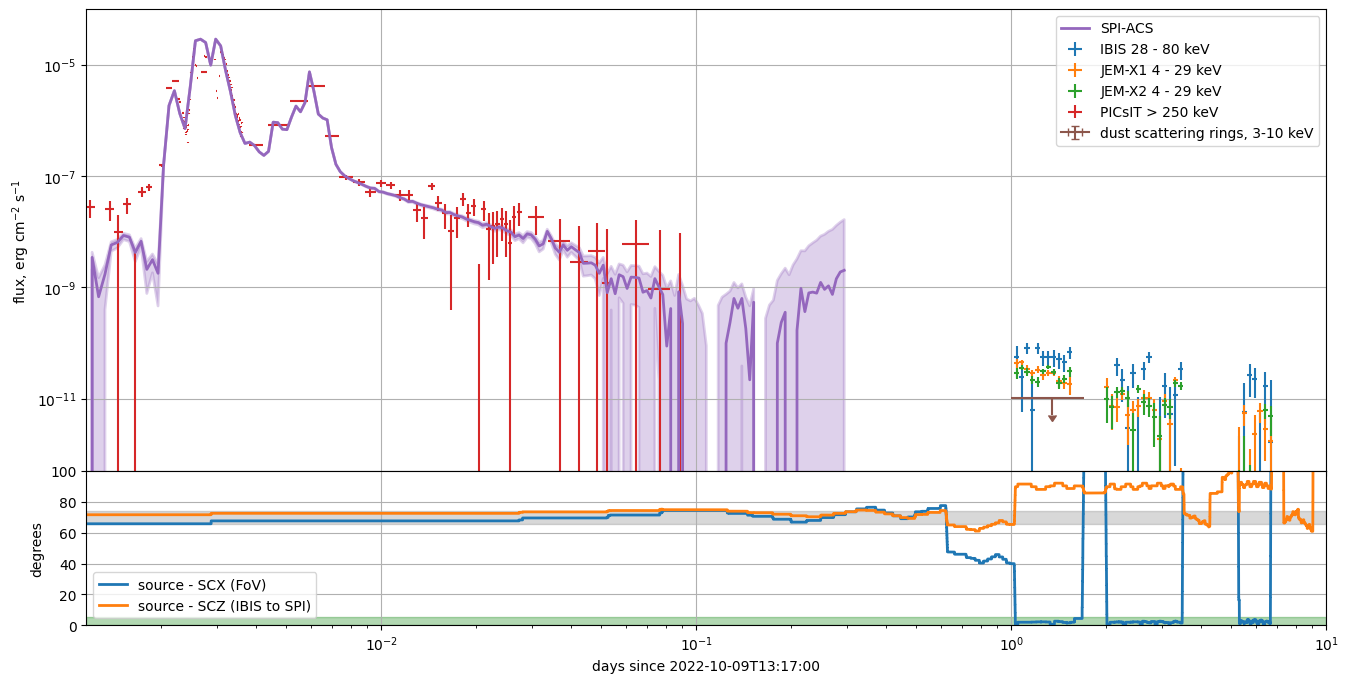

In [17]:
from astropy.io import fits


T = np.logspace(-1, 1, 120)
Tc = (T[1:] + T[:-1])/2.
dT = (T[1:] - T[:-1])/2.

# plt.figure(figsize=(16, 6))
f, axes = plt.subplots(2, 1, figsize=(16, 8), height_ratios=[3, 1], sharex=True)
plt.sca(axes[0])

ijd2plot = lambda t:(t- T0_ijd)

plt.axhline(0, lw=2, c='k', alpha=0.5)


for label, n in [('IBIS', 'IBIS'),
                 ('JEM-X1', 'JMX1'),
                 ('JEM-X2', 'JMX2')
                ]:

    f = fits.open(f"grbbase_fitspack_total_3p/{n}_lc_GRB221009A.fits")
    d = f[1].data
    conversion_factor = get_conversion('JMX1').mean()

    # plt.errorbar(ijd2plot(isgri_lc['TIME']), isgri_lc['RATE'], isgri_lc['ERROR'])

    d['RATE'][d['ERROR'] > np.nanmedian(d['ERROR'])*10] = np.NaN    

    r = rebin_in_bins(d['TIME'] - T0_ijd, d['RATE'], T)
    re = rebin_in_bins(d['TIME'] - T0_ijd, d['ERROR'], T, agg=lambda x:(np.sum(x**2))**0.5/len(x))

    m = re < np.nanmedian(re)*3

    # factor = 1e-8/200
    factor = conversion_factor

    plt.errorbar(
        Tc[m], 
        r[m]*factor,
        re[m]*factor,
        xerr=dT[m],
        label=f"{label} {int(f[1].header['E_MIN']):d} - {int(f[1].header['E_MAX']):d} keV",
        ls=""
    )

    lc_by_instrument[n] = {'t': Tc[m], 'r': r[m], 're': re[m], 'conversion_factor': conversion_factor}

m = (picsit_lc.mjd - (T0_ijd + 51544)) < 0.1

# c = plt.plot(
c = plt.errorbar(
    (picsit_lc.mjd - (T0_ijd + 51544))[m], 
    picsit_lc.flux[m],
    picsit_lc.flux_err[m],
    xerr=picsit_lc.dt[m]/2,
    ls="",
    label='PICsIT > 250 keV'
)[0].get_color()

# plt.fill_between(
#     (picsit_lc.mjd - (T0_ijd + 51544))[m], 
#     picsit_lc.flux[m] - picsit_lc.flux_err[m],
#     picsit_lc.flux_err[m] + picsit_lc.flux_err[m],
#     # xerr=picsit_lc.dt[m]/2,
#     # ls="",
#     # label='PICsIT > 250 keV'
#     alpha=0.3,
#     color=c
# )


lc_by_instrument['picsit'] = {'t': (picsit_lc.mjd - (T0_ijd + 51544))[m], 'r': picsit_lc.flux[m], 're': picsit_lc.flux_err[m], 'conversion_factor': 1}

n = 1000

def rebin(x, n):
    N = int(len(x)/n)
    return np.array(x[:N*n]).reshape((N, n)).sum(1)


## ACS
# TODO: check values
bkg = 5336.468053846153
cts_to_fluence = 3e-10
t_acs_offset = 70./24/3600

tail_change = 0.01
tail_bins = np.logspace(-3, np.log10(0.3), 200)

acs_T = np.concatenate([np.linspace(0, tail_change, int(tail_change/0.1)), tail_bins])
acs_Tc = (acs_T[1:] + acs_T[:-1])/2.
acs_dT = (acs_T[1:] - acs_T[:-1])/2.

from rebin import rebin_in_bins, rebin_bins_in_bins


acs_C = rebin_in_bins(acslc.t - T0_ijd, acslc.c - bkg - acslc.bkg_mean, acs_T, agg=lambda x:(np.sum(x))/len(x))
acs_Cmin = rebin_in_bins(acslc.t - T0_ijd, acslc.c - bkg - acslc.bkg_max, acs_T, agg=lambda x:(np.sum(x))/len(x))
acs_Cmax = rebin_in_bins(acslc.t - T0_ijd, acslc.c - bkg - acslc.bkg_min, acs_T, agg=lambda x:(np.sum(x))/len(x))

c = None

c = plt.plot(
    acs_Tc- t_acs_offset,
    acs_C * cts_to_fluence,
    lw=2,
    label="SPI-ACS"
)[0].get_color()


c = plt.fill_between(
    acs_Tc - t_acs_offset,
    acs_Cmin * cts_to_fluence,
    acs_Cmax * cts_to_fluence,
    lw=2,
    color=c,
    alpha=0.3
)

lc_by_instrument['acs'] = {'t': acs_Tc - t_acs_offset, 'r': acs_C, 're': (acs_Cmax - acs_Cmin)/2, 'conversion_factor': cts_to_fluence}

# TODO: picsit erange

plt.errorbar(
    (rings_r2558_t1_since_t0_d + rings_r2558_t2_since_t0_d)/2.,
    rings_flux_ecs_3_10_r2558,
    rings_flux_ecs_3_10_r2558/2.,
    xerr=(rings_r2558_t2_since_t0_d - rings_r2558_t1_since_t0_d)/2.,    
    uplims=[True],
    label="dust scattering rings, 3-10 keV"
)



plt.ylim([0.5e-12, 1e-4])
plt.ylabel("flux, erg cm$^{-2}$ s$^{-1}$")
plt.loglog()
plt.grid()
plt.legend()

plt.sca(axes[1])

m_stable_ons_response = plot_obs()

plt.ylabel("degrees")
plt.ylim([0, 100])
plt.xlim([100./24/3600, 10])

# plt.grid(which='both')
plt.grid()

plt.legend(loc="lower left")

plt.xlabel(f"days since {T0_isot}")

plt.subplots_adjust(hspace=0)
# plt.semilogx()

plt.savefig("lc.png")
plt.savefig("lc.pdf")

# TODO: plot early AG SPI-ACS
# TODO: plot model fitb
# TODO: plot rings contribution approx



9.999988000013202e-12 [9.999999999999994e-06]


[]

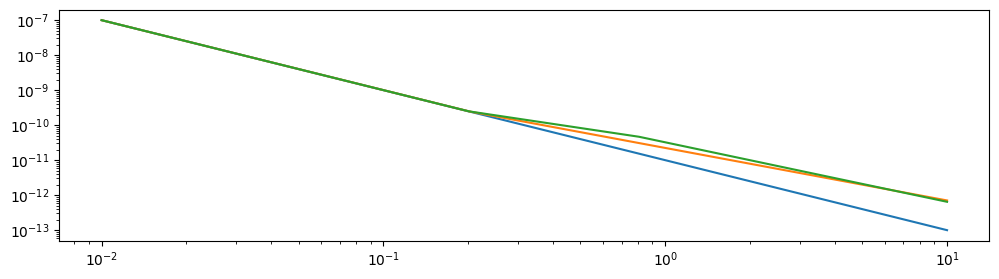

In [18]:
t_N = 1.

def conversion_for_instrument(i):
    return lc_by_instrument[i]['conversion_factor']

def s_t_model_gen(N, slope, t_break=np.NaN, slope_pb=np.NaN, t_break_er=np.NaN, slope_mid=np.NaN):

    def model(t, i):
        this_N = N
        this_slope = slope

        if not np.isnan(t_break) and t > t_break:
            this_slope = slope_pb
            this_N -= np.log10(t_break) * (slope_pb - slope)
            if not np.isnan(t_break_er):
                this_N += np.log10(t_break) * (slope_mid - slope)    
                this_N -= np.log10(t_break_er) * (slope_mid - slope)
            
        if not np.isnan(t_break_er) and t_break_er < t < t_break:
            this_slope = slope_mid
            this_N -= np.log10(t_break_er) * (slope_mid - slope)
            
        m = 10**this_N*(t/t_N)**this_slope/conversion_for_instrument(i)
        
        # if t > 1 and t < 1.7:
        #     m += rings_flux_ecs_3_10_r2558
    
        return m
    
    # TODO: this is too slow
    return np.frompyfunc(model, 2, 1)    

print(s_t_model_gen(-11, -1.2)(1.000001, 'picsit'), s_t_model_gen(-11, -1.2)(np.array([0.00001]), 'picsit'))

plt.figure(figsize=(12, 3))

t = np.logspace(-2, 1, 1000)

plt.plot(t, s_t_model_gen(-11, -2)(t, 'picsit'))
plt.plot(t, s_t_model_gen(-11, -2, 0.2, -1.5)(t, 'picsit'))
plt.plot(t, s_t_model_gen(-11, -2, 0.8, -1.7, 0.2, -1.2)(t, 'picsit'))
plt.loglog()

/tmp/ipykernel_528457/1446606060.py:23: RuntimeWarning: invalid value encountered in double_scalars
  m = 10**this_N*(t/t_N)**this_slope/conversion_for_instrument(i)
  0%|          | 0/30 [00:00<?, ?it/s]/home/savchenk/miniconda-recent/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 30/30 [00:01<00:00, 17.60it/s]


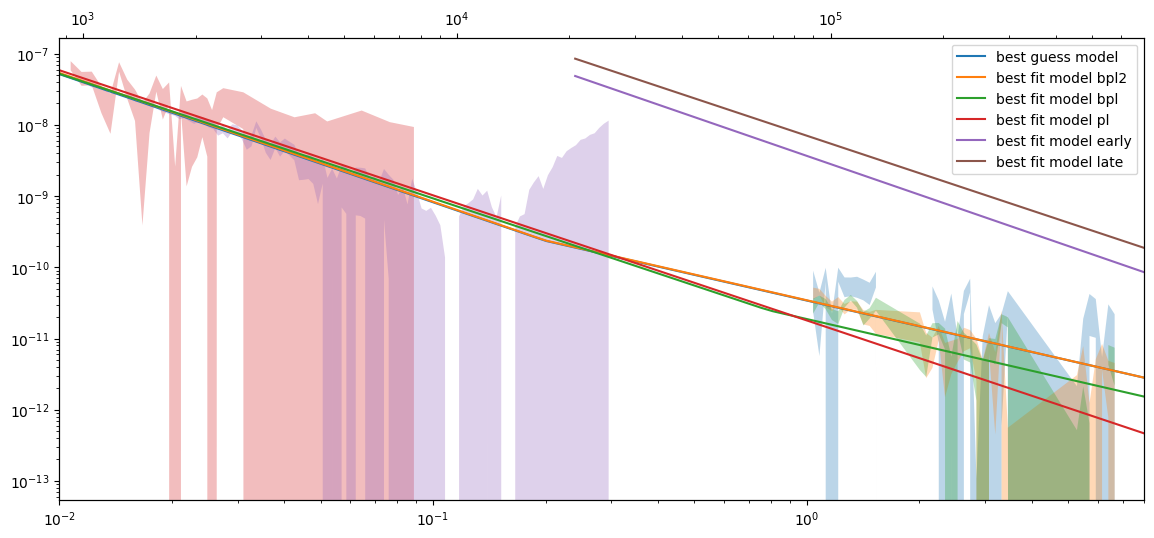

In [19]:
import numpy as np
import emcee
from scipy.stats import norm


plt.figure(figsize=(14, 6))


def fitit(ipick, p0_v = [np.log10(1e-11), -1.8]):
    ndim, nwalkers = len(p0_v), 100
    p0_c = np.array([p0_v]*nwalkers)
    p0 = norm(p0_c, p0_c.__abs__()*0.05).rvs()

    def log_prior(p):
        if not (-12.5 < p[0] < -10.5):
            return -np.inf
        
        if not (-3 < p[1] < -1):
            return -np.inf

        if len(p) > 2 and not np.isnan(p[2]) and not (0.01 < p[2] < 5):
            return -np.inf

        return 0.0
        

    def log_prob(p):
        mll = 0

        lp = log_prior(p)
        if not np.isfinite(lp):
            return -np.inf

        for n, d in lc_by_instrument.items():
            # print(n)
            if ipick(n):
            # if n in ['JMX1', 'JMX2', 'IBIS', 'picsit']:
                model = s_t_model_gen(*p)(d['t'], n)

                sigma2 = d['re']**2

                m = d['t'] > 1000./24/3600
                dev = ((model - d['r'])**2/sigma2)[m]
                
                c_mll = -0.5 * dev.sum() + np.log(sigma2.mean())

                # c_mll = norm(model, d['re']).logpdf(d['r']) #.sum()

                # print(p, 'model', s_t_model_gen(*p)(1, n), c_mll)
                
                mll += c_mll.sum()

        if np.isnan(mll):
            print("this returns NaN:", p, mll)
            return -np.inf
                
        return mll + lp

    # from multiprocessing import Pool

    # with Pool() as pool:
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob) #, pool=pool)
    sampler.run_mcmc(p0, nsampler, progress=True)

    p_best = [np.mean(np.percentile(r, [40, 60])) for r in sampler.flatchain.transpose()]
    p_range = [np.percentile(r, [5, 95]) for r in sampler.flatchain.transpose()]
    return {'p_best': p_best, 'p_range': p_range}


T = np.logspace(-2, 1, 100)

plt.plot(T, s_t_model_gen(np.log10(1.3e-11), -1.8, 0.8, -1.2, 0.2, -1.2)(T, 'picsit'), label="best guess model")

ag_fit = {}


r = fitit(lambda n: True, p0_v = [np.log10(1.3e-11), -1.8, 0.8, -1.2, 0.2, -1.2])
ag_fit['all_bpl2'] = r
plt.plot(T, s_t_model_gen(*r['p_best'])(T, 'picsit'), label=f"best fit model bpl2")

r = fitit(lambda n: True, p0_v = [np.log10(1.3e-11), -1.8, 0.8, -1.2])
ag_fit['all_bpl'] = r
plt.plot(T, s_t_model_gen(*r['p_best'])(T, 'picsit'), label="best fit model bpl")

r = fitit(lambda n: True, p0_v = [np.log10(1.3e-11), -1.8])
ag_fit['all_pl'] = r
plt.plot(T, s_t_model_gen(*r['p_best'])(T, 'picsit'), label="best fit model pl")

r = fitit(lambda n: n in ['acs', 'picsit'])
ag_fit['acs_picsit'] = r
plt.plot(T, s_t_model_gen(*r['p_best'])(T, 'picsit'), label="best fit model early", ls=":")

r = fitit(lambda n: n in ['JMX1', 'JMX2', 'IBIS'])
ag_fit['jmx_ibis'] = r
plt.plot(T, s_t_model_gen(*r['p_best'])(T, 'picsit'), label="best fit model late", ls=":")


plt.legend()

for n, d in lc_by_instrument.items():
    m = d['t'] > 0.01
    plt.fill_between(d['t'][m], 
                     (d['r'] - d['re'])[m] * conversion_for_instrument(n),
                     (d['r'] + d['re'])[m] * conversion_for_instrument(n), alpha=0.3)

plt.loglog()
plt.xlim([1e-2, 8])

xl_d = plt.gca().get_xlim()

plt.twiny()
plt.xlim(np.array(xl_d)*24*3600)
plt.semilogx()

plt.savefig("st_models.pdf")
plt.savefig("st_models.png")

# TODO: separate fits for two sections with a break
# TODO: make spectral real
# TODO: make steps with fill

In [20]:
print(ag_fit['all_bpl2']['p_best'][2]*24*3600)
print(ag_fit['all_bpl2']['p_best'][4]*24*3600)

ag_fit

69387.07761525341
17252.666672134845


{'all_bpl2': {'p_best': [-10.888367652216905,
   -1.8094687386187067,
   0.8030911761024699,
   -1.2044853187669657,
   0.19968364203859773,
   -1.2003492154373028],
  'p_range': [array([-11.18509955,  -9.89369239]),
   array([-1.91081699, -1.70694341]),
   array([0.74686126, 0.86531267]),
   array([-1.30096902, -1.10856332]),
   array([0.18555466, 0.21254624]),
   array([-1.29140102, -1.10607829])]},
 'all_bpl': {'p_best': [-10.782173850955438,
   -1.7503805129700418,
   0.7891177018461959,
   -1.2068080789100037],
  'p_range': [array([-11.20313693, -10.01904045]),
   array([-1.8725601 , -1.61738977]),
   array([0.66049828, 0.865983  ]),
   array([-1.2942611 , -1.10192716])]},
 'all_pl': {'p_best': [-10.745954280420449, -1.757229804885104],
  'p_range': [array([-11.17980302,  -9.92875739]),
   array([-1.92491436, -1.60811185])]},
 'acs_picsit': {'p_best': [-10.93301743400604, -1.81013575910746],
  'p_range': [array([-11.3674019 , -10.64838826]),
   array([-1.90734344, -1.70305617])]},

In [21]:

# import corner

# samples = sampler.get_chain(flat=False)
# flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)

# # _=plt.hist(samples[:, 0], 100, color="k", histtype="step")
# fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
# labels = ["m", "b", "log(f)"]
# for i in range(ndim):
#     ax = axes[i]
#     ax.plot(samples[:, :, i], "k", alpha=0.3)
#     ax.set_xlim(0, len(samples))
#     ax.set_ylabel(labels[i])
#     ax.yaxis.set_label_coords(-0.1, 0.5)

# axes[-1].set_xlabel("step number")

# _ = corner.corner(flat_samples)

# # plt.xlabel(r"$\theta_1$")
# # plt.ylabel(r"$p(\theta_1)$")
# # plt.gca().set_yticks([]);

In [22]:
lc_pdf = "lc.pdf"
relpos_history_pdf = "relpos_history.pdf"
st_models_pdf = "st_models.pdf"
comment_reconstruction = "assuming slope of -2"
theta_ons_min = theta[m_stable_ons_response].min()
theta_ons_max = theta[m_stable_ons_response].max()
approx_ons_t1_isot = Time(att_hist['POINTING_TIME'][m_stable_ons_response].min() + 51544, format='mjd').isot
approx_ons_t1_rel_d = att_hist['POINTING_TIME'][m_stable_ons_response].min() - T0_ijd
approx_ons_t2_isot = Time(att_hist['POINTING_TIME'][m_stable_ons_response].max() + 51544, format='mjd').isot
approx_ons_t2_rel_d = att_hist['POINTING_TIME'][m_stable_ons_response].max() - T0_ijd
ons_response_change_pc = 20 # check
ag_fit = ag_fit